# Descriptive Analyses

Intro tables to give context to the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid",{'axes.spines.left' : False,
                           'axes.spines.right': False,
                           'axes.spines.top': False,
                           'grid.linestyle': ':'})
sns.set_context("talk")

STUDY_ID ="60b37265a9f60881975de69e"


In [25]:
participants = pd.read_csv(f"../data/processed/{STUDY_ID}-participants.csv")
posts = pd.read_csv(f"../data/processed/{STUDY_ID}-rumour-results.csv")
reshare_rates = pd.read_csv(f"../data/processed/{STUDY_ID}-reshare_rates.csv")
post_study = pd.read_csv(f"../data/processed/{STUDY_ID}-post-study-responses.csv")
print("Shape: {}x{}".format(*reshare_rates.shape))

Shape: 197x49


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Initial Tables

1. Participant statistics
2. Experiment descriptive statistics

### Participant statistics

In [3]:
from tableone import TableOne
categorical = ["educationLevel","politicalAffiliation"] + [col for col in participants.columns if "gender" in col]
table_one = TableOne(participants.reset_index().drop(["user_id","timeSubmitted","consent"],
                                                     axis=1),
                                                     categorical = categorical)
table_one

Missing      Overall
n                                                                                                                       101
educationLevel, n (%)                                                                 communityCollege       0    14 (13.9)
                                                                                      doctorate                     1 (1.0)
                                                                                      graduateSchool              14 (13.9)
                                                                                      highSchool                  20 (19.8)
                                                                                      none                          1 (1.0)
                                                                                      undergrad                   51 (50.5)
politicalAffiliation, n (%)                                                           centre                 0    13 (12.9)
                                                                                      centreLeft                  35 (34.7)
                                                                                      centreRight                 12 (11.9)
                                                                                      left                        26 (25.7)
                                                                                      none                        11 (10.9)
                                                                                      right                         4 (4.0)
attendsProtests, mean (SD)                                                                                   6    0.1 (0.4)
age, mean (SD)                                                                                               0  31.3 (11.3)
gender_man, n (%)                                                                     0                      0    53 (52.5)
                                                                                      1                           48 (47.5)
gender_nonBinary, n (%)                                                               0                      0    99 (98.0)
                                                                                      1                             2 (2.0)
gender_woman, n (%)                                                                   0                      0    50 (49.5)
                                                                                      1                           51 (50.5)
affiliatedMovements_ women's equity (not "Gender"), mean (SD)                                                0    0.0 (0.0)
affiliatedMovements_Animal Welfare, mean (SD)                                                                0    0.0 (0.1)
affiliatedMovements_Anti-Extradition Law Amendment Bill Movement, mean (SD)                                  0    0.0 (0.0)
affiliatedMovements_Change animal cruelty laws , mean (SD)                                                   0    0.0 (0.1)
affiliatedMovements_LGB rights (none of that other alphabet-soup nonsense), mean (SD)                        0    0.0 (0.0)
affiliatedMovements_Pro-choice, mean (SD)                                                                    0    0.0 (0.0)
affiliatedMovements_Socioeconomic inequalities (healthcare retirement...), mean (SD)                         0    0.0 (0.1)
affiliatedMovements_climate, mean (SD)                                                                       0    0.8 (0.4)
affiliatedMovements_free apartheid of Palestinians , mean (SD)                                               0    0.0 (0.0)
affiliatedMovements_freeSpeech, mean (SD)                                                                    0    0.6 (0.5)
affiliatedMovements_gender, n (%)                                                     0                      0    22 (21.8)
           

### Experiment descriptive statistics

In [4]:
table_two = TableOne(posts.reset_index().drop(["user_id","timeSubmitted","rumour","evidence","code","posterId","id"],
                                              axis=1),
                     groupby=["condition","evidence"],
                     pval=True)
table_two

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grouped by condition                                                  
                                            Missing       Overall       control     treatment P-Value
n                                                            5600          3248          2352        
secondsTaken, mean (SD)                           0  103.0 (25.6)   98.8 (26.6)  108.8 (22.9)  <0.001
warning, n (%)          False                     0   4928 (88.0)  3248 (100.0)   1680 (71.4)  <0.001
                        True                           672 (12.0)                  672 (28.6)        
reshared, n (%)         False                     0   4747 (84.8)   2780 (85.6)   1967 (83.6)   0.048
                        True                           853 (15.2)    468 (14.4)    385 (16.4)        
clickedWarning, n (%)   False                     0   5585 (99.7)  3248 (100.0)   2337 (99.4)  <0.001
                        True                             15 (0.3)                    15 (0.6)        
timestamp, mean (SD)                              0   30.1 (17.0)   30.3 (17.0)   29.8 (17.0)   0.335
posterGender, n (%)     female                    0   2772 (49.5)   1568 (48.3)   1204 (51.2)   0.034
                        male                          2828 (50.5)   1680 (51.7)   1148 (48.8)

In [5]:
table_three = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Affirms")
table_three

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.135088,0.140000
Low,0.115517,0.095238


In [6]:
table_four = pd.pivot_table(reshare_rates,index="evidence",columns="condition",values="Denies")
table_four

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition,Control,Treatment
evidence,,
High,0.063158,0.090000
Low,0.220690,0.304762


In [7]:
table_five = reshare_rates.groupby(["condition","evidence"])[["Affirms",
                                                 "Denies",
                                                 ]].mean().T
table_five

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


condition   Control           Treatment          
evidence       High       Low      High       Low
Affirms    0.135088  0.115517      0.14  0.095238
Denies     0.063158  0.220690      0.09  0.304762

### Other Basic Questions

1. How frequently do users click on the warning?

#### How frequently do users click on the warning?

In [8]:
treat = posts[(posts["condition"]=='treatment') & posts["warning"]].reset_index()
num_treat = len(treat["user_id"].unique())
clicked_warning = treat[treat["clickedWarning"]]
num_clicked = len(clicked_warning["user_id"].unique())
print(f"{100*(num_clicked/num_treat):.2f}% ({num_clicked}/{num_treat}) of participants clicked a warning")


20.93% (9/43) of participants clicked a warning


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
print(f"Credibility indicators were only clicked on {100*len(clicked_warning)/len(treat):.2f}% ({len(clicked_warning)}/{len(treat)}) of the time")

Credibility indicators were only clicked on 2.23% (15/672) of the time


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sample Visualizations

## Hypotheses


The presence of credibility indicators in the system will:

- $H_1$: *decrease* the *affirmation rate* for rumours with lower evidence levels.
- $H_2$: *increase* the *denial rate* for rumours with lower evidence levels.
- $H_3$: *increase* the *affirmation rate* for rumours with higher evidence levels.
- $H_4$: *decrease* the *denial rate* for rumours with higher evidence levels.

**Some visualizations**

In [10]:
melted = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars=reshare_rates.columns[-5:-1],
                            var_name='code', 
                            value_name='reshared')
sorting_dict = {'Control': 0, 
                'Treatment': 1, 
                'Affirms': 0,
                'Denies': 1,
                'Neutral': 2,
                'Questions': 3,
                'High': 0,
                'Low': 1}
melted = melted.sort_values(by=['condition','code','evidence'],key=lambda x: x.map(sorting_dict))
af_di = melted[melted["code"].isin(["Affirms","Denies"])]

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


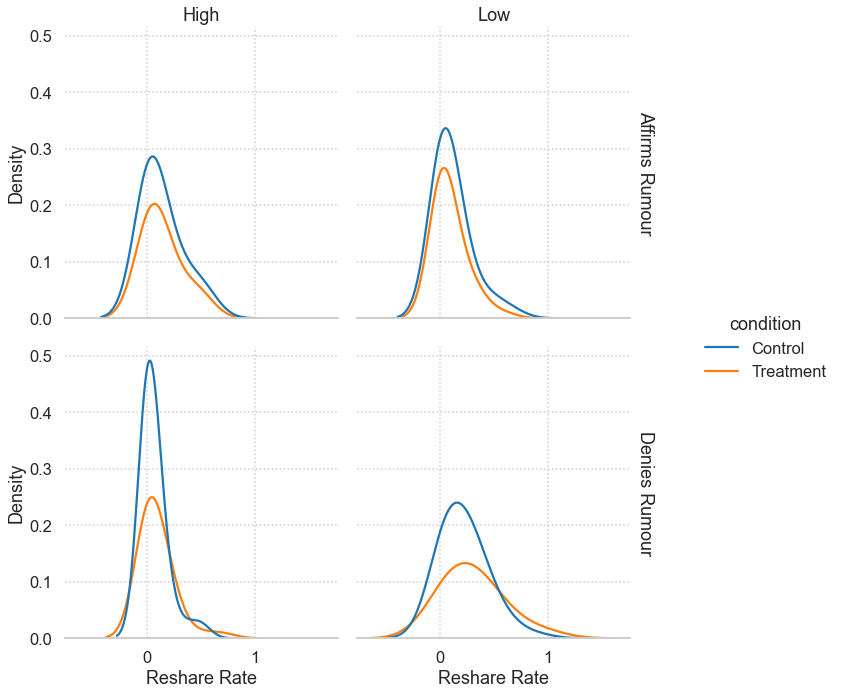

In [11]:
g = sns.displot(data=af_di, 
            x="reshared",
            hue="condition",
            col="evidence",
            row="code",
            bw_adjust=1.8,
            facet_kws={"margin_titles":True},
            kind="kde")
g.set_titles(col_template="{col_name}", row_template="{row_name} Rumour")
g.set_axis_labels(x_var="Reshare Rate")
sns.despine(left=True)
g.fig.savefig("../figures/descriptive_analysis/reshare_rate-hist.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


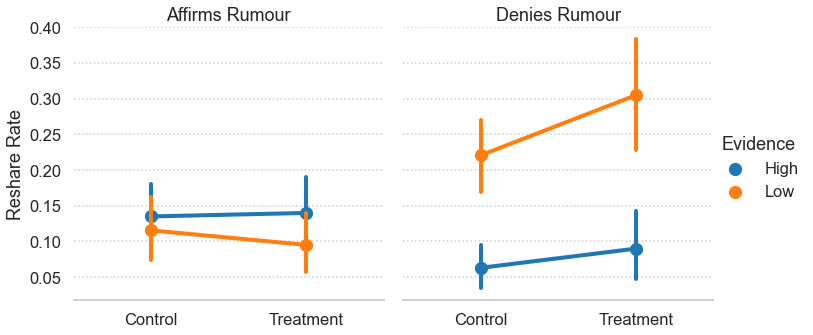

In [12]:
g = sns.catplot(data=af_di, 
            x="condition",
            y="reshared",
            hue="evidence",
            col="code",
            col_wrap=2,
            margin_titles=True,
            kind="point")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="")
g._legend.set_title("Evidence")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/reshare_rate-point_plot.pdf")

**For seeing how to describe this plot. Look at Pennycook's Nature article.**

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


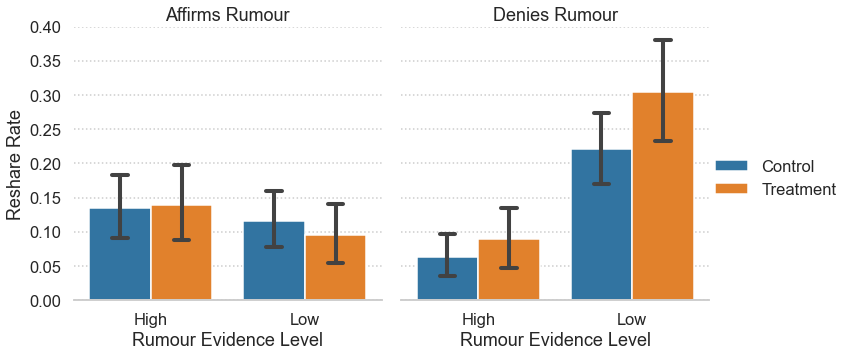

In [13]:
g = sns.catplot(data=af_di, 
            x="evidence",
            y="reshared",
            hue="condition",
            col="code",
            col_wrap=2,
            capsize=.1,
            margin_titles=True,
            kind="bar")
g.set_titles(col_template="{col_name} Rumour",)
g.set_axis_labels(y_var="Reshare Rate",x_var="Rumour Evidence Level")
g._legend.set_title("")
sns.despine(left=True)
g.savefig("../figures/descriptive_analysis/reshare_rate-bar_plot.pdf")

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


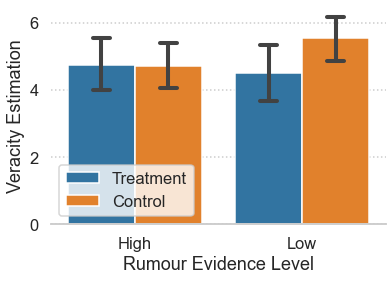

In [48]:
post_study["condition"] = np.where(post_study["interventionFactor"] == "control",'Control','Treatment')
estimates = post_study.melt(id_vars=["user_id","condition"],
                            value_vars=["veracityR1","veracityR2"],
                            var_name='Rumour', 
                            value_name='Veracity Estimation')
estimates["Evidence"] = np.where(estimates['Rumour'] == 'veracityR1','High','Low')
g = sns.barplot(data=estimates, 
            x="Evidence",
            y="Veracity Estimation",
            hue="condition",
            capsize=.1)
g.set(ylabel="Veracity Estimation",xlabel="Rumour Evidence Level")
plt.legend(title='')
sns.despine(left=True)

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-825e831a2fab>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  rumour_prop = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],


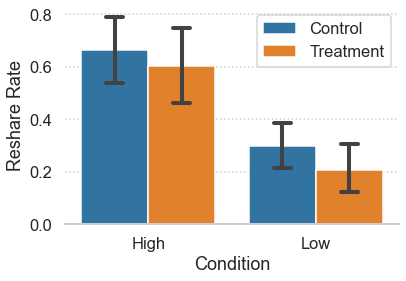

In [15]:
rumour_prop = reshare_rates.melt(id_vars=reshare_rates.columns[:-5],
                            value_vars="rumour_proportion",
                            var_name='code', 
                            value_name='rumour_proportion')
g = sns.barplot(data=rumour_prop, 
            x="evidence",
            y="rumour_proportion",
            hue="condition",
            capsize=.1)
g.set(ylabel="Reshare Rate",xlabel="Condition")
plt.legend(title='')

**DISREGARD FROM HERE ON OUT**

*old statistical analyses that need to be refactored and moved to the system analysis script*

### $H_1$

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Add a random effect for the participant ID since there are repeated measures

md = smf.ols(f"Affirms ~ C(condition)*C(evidence)",#" + (1 | user_id) + age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
             reshare_rates).fit()
md.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/patsy/constraint.py:13: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Affirms   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.6806
Date:                Sat, 05 Jun 2021   Prob (F-statistic):              0.565
Time:                        12:40:07   Log-Likelihood:                 78.077
No. Observations:                 197   AIC:                            -148.2
Df Residuals:                     193   BIC:                            -135.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.1351      0.022      6.201      0.000       0.092       0.178
C(condition)[T.Treatment]                        0.0049      0.034      0.145      0.885      -0.062       0.072
C(evidence)[T.Low]                              -0.0196      0.031     -0.638      0.524      -0.080       0.041
C(condition)[T.Treatment]:C(evidence)[T.Low]    -0.0252      0.048     -0.530      0.597      -0.119       0.069
==============================================================================
Omnibus:                       49.630   Durbin-Watson:                   1.366
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.732
Skew:                           1.421   Prob(JB):                     8.01e-18
Kurtosis:                       4.229   Cond. No.                         6.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
table = sm.stats.anova_lm(md, typ=2) # Type 2 Anova DataFrame
table

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sum_sq,df,F,PR(>F)
C(condition),0.002994,1.0,0.110664,0.739750
C(evidence),0.044469,1.0,1.643874,0.201333
C(condition):C(evidence),0.007591,1.0,0.280632,0.596896
Residual,5.220907,193.0,NaN,NaN


In [18]:
md2 = smf.mixedlm(f"Affirms ~ C(condition)*C(evidence)",#"+ age + C(educationLevel) + {affil_columns} + {sm_cols} + {gender_cols} + (1|PROLIFIC_ID)",
                     reshare_rates,
                     groups=reshare_rates["user_id"]).fit()
md2.summary()

/Users/cameron/.local/share/virtualenvs/code-3gDjSy3u/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Mixed Linear Model Regression Results
=======================================================================================
Model:                        MixedLM            Dependent Variable:            Affirms
No. Observations:             197                Method:                        REML   
No. Groups:                   100                Scale:                         0.0126 
Min. group size:              1                  Log-Likelihood:                82.7476
Max. group size:              2                  Converged:                     Yes    
Mean group size:              2.0                                                      
---------------------------------------------------------------------------------------
                                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------
Intercept                                     0.135    0.022  6.216 0.000  0.092  0.177
C(condition)[T.Treatment]                     0.008    0.034  0.233 0.816 -0.058  0.074
C(evidence)[T.Low]                           -0.019    0.021 -0.924 0.355 -0.061  0.022
C(condition)[T.Treatment]:C(evidence)[T.Low] -0.028    0.033 -0.861 0.389 -0.092  0.036
Group Var                                     0.014    0.037                           
=======================================================================================

"""